## Predicting Employee Turnover with Decision Tree & SMOTE Techniques

# Intorduction

Employee attrition has become a major challenge for companies today. When employees leave, organizations face increased hiring costs, reduced productivity, and loss of skilled talent.
In this project, we aim to build a machine learning model that predicts whether an employee is likely to leave the company (Attrition: Yes/No).
This helps HR teams take data-driven decisions and improve employee retention.


# Problem Statement

The project focuses on identifying key factors that influence employee attrition and predicting which employees are at a high risk of leaving. Using demographic, job-related, and satisfaction-level data, the goal is to create an accurate prediction model and help organizations take preventive actions to reduce turnover.


# Objective

To analyze employee-related data and identify patterns related to attrition
To build a machine learning model to predict employee turnover
To handle data imbalance using Upsampling and SMOTE
To compare model performance and identify the best approach
To provide actionable insights for HR decision-making

# Dataset Overview

Dataset: HR Employee Attrition
Target variable: Attrition (Yes/No)
Contains features like age, salary, job role, work-life balance, satisfaction ratings, etc.
Imbalanced dataset → Attrition = Yes is much lower

## Import Inportant Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
hr = pd.read_csv(r"C:\Users\Dell\Desktop\Latest Projects\Datasets\HR Attrition data\HR-Employee-Attrition.csv")

In [3]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Preprocessing

In [4]:
hr.shape

(1470, 35)

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
hr.duplicated().sum()

np.int64(0)

In [8]:
hr.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [9]:
hr['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

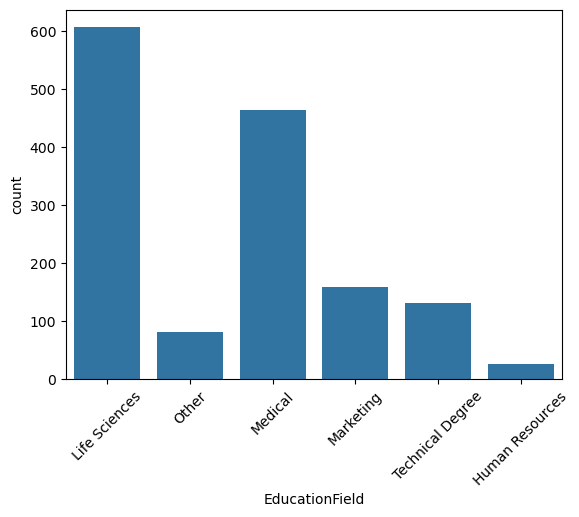

In [11]:
sns.countplot(data=hr, x=hr['EducationField']);
plt.xticks(size=10,rotation=45)

In [12]:
hr['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

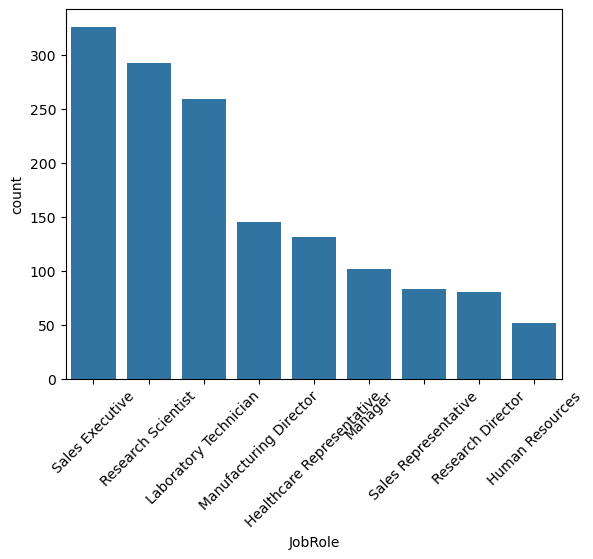

In [13]:
sns.countplot(data=hr, x=hr['JobRole']);
plt.xticks(size=10,rotation=45)

In [14]:
hr['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

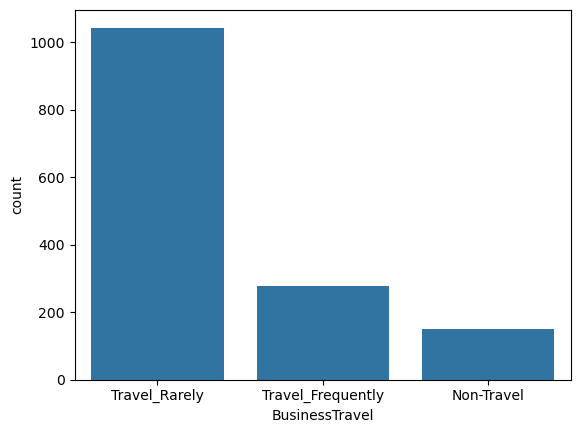

In [15]:
sns.countplot(data=hr, x=hr['BusinessTravel']);

In [16]:
hr['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

<Axes: xlabel='Department', ylabel='count'>

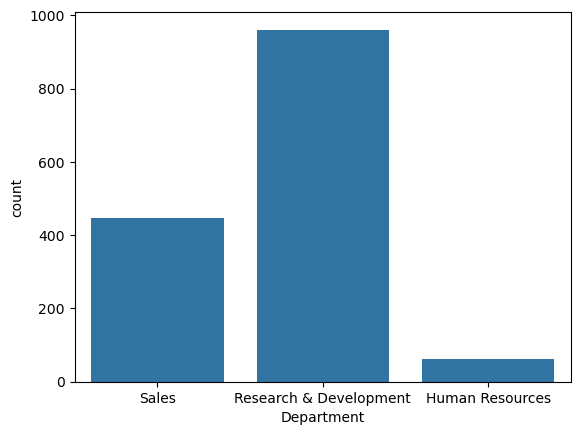

In [17]:
sns.countplot(data=hr, x=hr['Department'])

In [18]:
for i in hr.columns:
    print({i:hr[i].unique()})

{'Age': array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])}
{'Attrition': array(['Yes', 'No'], dtype=object)}
{'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)}
{'DailyRate': array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353, 

In [19]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [20]:
hr.groupby(['Department','Attrition'])['MonthlyIncome'].count()/len(hr)*100

Department              Attrition
Human Resources         No            3.469388
                        Yes           0.816327
Research & Development  No           56.326531
                        Yes           9.047619
Sales                   No           24.081633
                        Yes           6.258503
Name: MonthlyIncome, dtype: float64

(array([289.,   0.,   0., 280.,   0.,   0., 442.,   0.,   0., 459.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

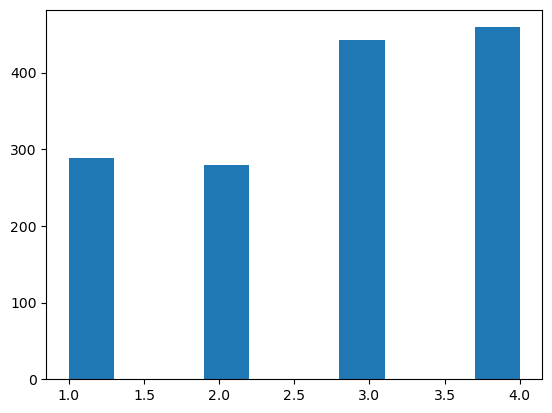

In [21]:
plt.hist(
    x = hr['JobSatisfaction'],
    bins=10
)

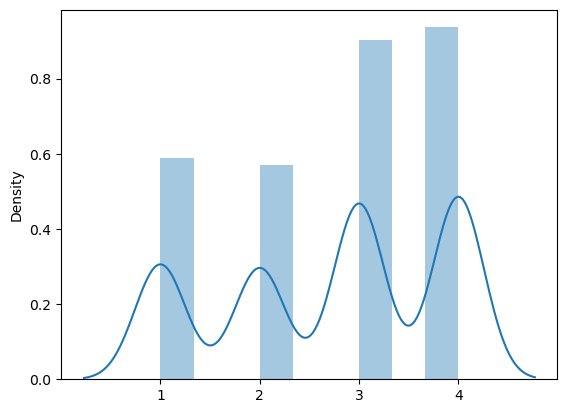

In [22]:
sns.distplot(
    x = hr['JobSatisfaction']
);

In [23]:
hr.groupby(['HourlyRate','Attrition']).count()/len(hr)*100

Age  BusinessTravel  DailyRate  Department  \
HourlyRate Attrition                                                    
30         No         1.292517        1.292517   1.292517    1.292517   
31         No         0.884354        0.884354   0.884354    0.884354   
           Yes        0.136054        0.136054   0.136054    0.136054   
32         No         1.360544        1.360544   1.360544    1.360544   
           Yes        0.272109        0.272109   0.272109    0.272109   
...                        ...             ...        ...         ...   
98         Yes        0.204082        0.204082   0.204082    0.204082   
99         No         1.088435        1.088435   1.088435    1.088435   
           Yes        0.272109        0.272109   0.272109    0.272109   
100        No         0.952381        0.952381   0.952381    0.952381   
           Yes        0.340136        0.340136   0.340136    0.340136   

                      DistanceFromHome  Education  EducationField  \
HourlyRate Attrition                                                
30         No                 1.292517   1.292517        1.292517   
31         No                 0.884354   0.884354        0.884354   
           Yes                0.136054   0.136054        0.136054   
32         No                 1.360544   1.360544        1.360544   
           Yes                0.272109   0.272109        0.272109   
...                                ...        ...             ...   
98         Yes                0.204082   0.204082        0.204082   
99         No                 1.088435   1.088435        1.088435   
           Yes                0.272109   0.272109        0.272109   
100        No                 0.952381   0.952381        0.952381   
           Yes                0.340136   0.340136        0.340136   

                      EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
HourlyRate Attrition                                                           
30         No              1.292517        1.292517                 1.292517   
31         No              0.884354        0.884354                 0.884354   
           Yes             0.136054        0.136054                 0.136054   
32         No              1.360544        1.360544                 1.360544   
           Yes             0.272109        0.272109                 0.272109   
...                             ...             ...                      ...   
98         Yes             0.204082        0.204082                 0.204082   
99         No              1.088435        1.088435                 1.088435   
           Yes             0.272109        0.272109                 0.272109   
100        No              0.952381        0.952381                 0.952381   
           Yes             0.340136        0.340136                 0.340136   

                        Gender  JobInvolvement  JobLevel   JobRole  \
HourlyRate Attrition                                                 
30         No         1.292517        1.292517  1.292517  1.292517   
31         No         0.884354        0.884354  0.884354  0.884354   
           Yes        0.136054        0.136054  0.136054  0.136054   
32         No         1.360544        1.360544  1.360544  1.360544   
           Yes        0.272109        0.272109  0.272109  0.272109   
...                        ...             ...       ...       ...   
98         Yes        0.204082        0.204082  0.204082  0.204082   
99         No         1.088435        1.088435  1.088435  1.088435   
           Yes        0.272109        0.272109  0.272109  0.272109   
100        No         0.952381        0.952381  0.952381  0.952381   
           Yes        0.340136        0.340136  0.340136  0.340136   

                      JobSatisfaction  MaritalStatus  MonthlyIncome  \
HourlyRate Attrition                                                  
30         No                1.292517       1.292517       1.292517   
31         No 

In [24]:
#pd.crosstab(hr['YearsSinceLastPromotion'], hr['Attrition']) / len(hr)*100

In [25]:
colname = []

for x in hr.columns:
    if hr[x].dtype == 'object':
        colname.append(x)
colname

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in hr.columns:
    if hr[col].dtype == 'object':
        hr[col] = encoder.fit_transform(hr[col])

In [27]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


In [28]:
hr['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

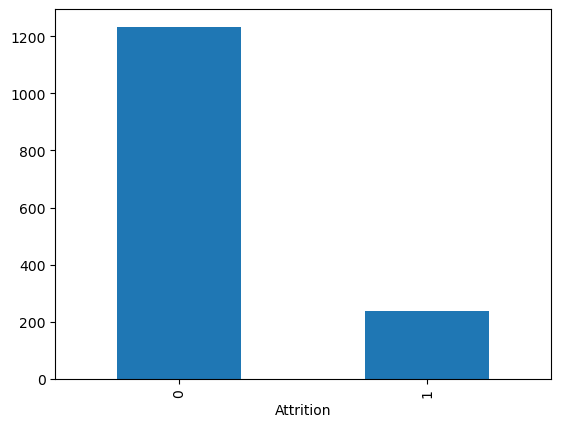

In [29]:
Hr_plot = hr["Attrition"].value_counts().plot(kind='bar')

## Split the data into X and Y variable (Dependent & Independent)

In [30]:
X = hr.drop(['Attrition'], axis=1)
Y = hr['Attrition']

In [31]:
X.shape

(1470, 34)

In [32]:
Y.shape

(1470,)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [34]:
X.shape
Y.shape

(1470,)

## Split data into training & Testing Model

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,
    random_state = 0
)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 34)
(441, 34)
(1029,)
(441,)


## DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=0)

model_DecisionTree.fit(x_train,y_train)

y_pred = model_DecisionTree.predict(x_test)

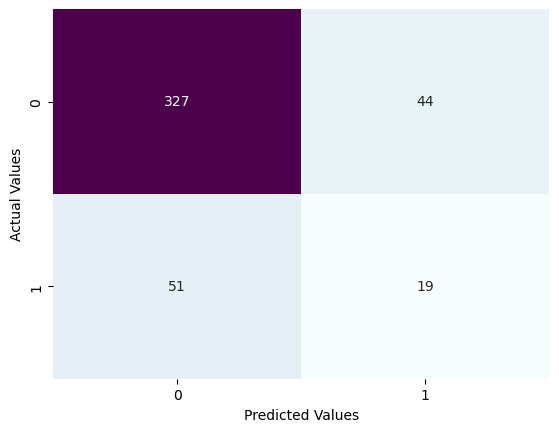

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       371
           1       0.30      0.27      0.29        70

    accuracy                           0.78       441
   macro avg       0.58      0.58      0.58       441
weighted avg       0.78      0.78      0.78       441

Accuracy of the model: 0.7845804988662132


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Classification report:')
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

In [39]:
model_DecisionTree.score(x_train,y_train)

1.0

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,  # 33% data for testing and remaining data will be for training
    random_state = 0
)

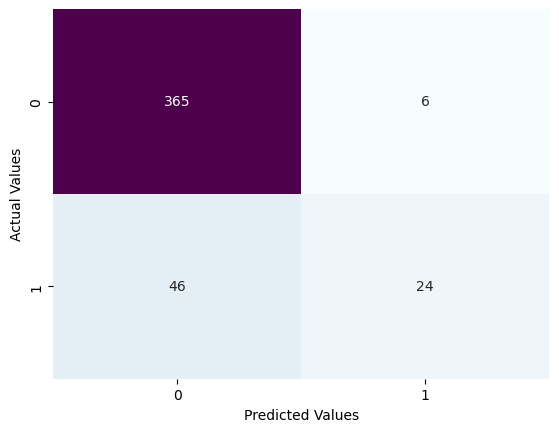

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.80      0.34      0.48        70

    accuracy                           0.88       441
   macro avg       0.84      0.66      0.71       441
weighted avg       0.87      0.88      0.86       441

Accuracy of the model: 0.8820861678004536


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Classification report:')
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

## Hyperparameter Tuning

# Decisiontreeclassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(
    criterion="gini",
    random_state = 0,
    splitter="best",
    min_samples_leaf = 15,
    max_depth=20,
    max_leaf_nodes=25
)

model_DecisionTree.fit(x_train,y_train)
y_pred = model_DecisionTree.predict(x_test)

list(zip(y_test,y_pred))
print(list(zip(y_test,y_pred)))

[(0, np.int64(0)), (0, np.int64(0)), (1, np.int64(0)), (0, np.int64(0)), (1, np.int64(1)), (0, np.int64(0)), (1, np.int64(1)), (0, np.int64(0)), (0, np.int64(0)), (1, np.int64(0)), (0, np.int64(0)), (1, np.int64(0)), (0, np.int64(0)), (1, np.int64(1)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (1, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(1)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(1)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (1, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (1, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (1, np.int64(1)), (0, np.int64(0)), (0, np.int64(0)), (1, np.int64(1)), (1, np.int64(1)), (0, np.int64(0)), (1, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (1, np.int64(1)), (0, np.in

[[351  20]
 [ 43  27]]


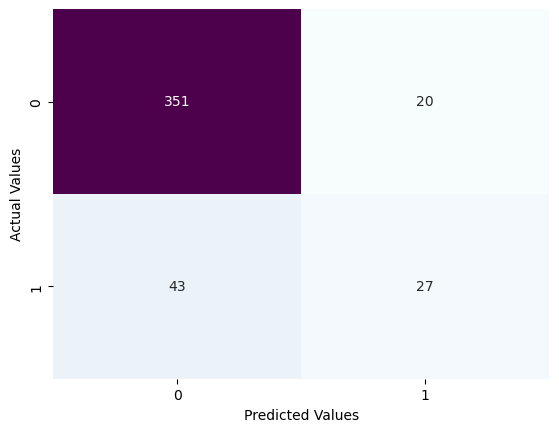

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       371
           1       0.57      0.39      0.46        70

    accuracy                           0.86       441
   macro avg       0.73      0.67      0.69       441
weighted avg       0.84      0.86      0.85       441

Accuracy of the model :  0.8571428571428571


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)
sns.heatmap(
    cfm,
    annot=True,
    fmt="g",
    cbar=False,
    cmap="BuPu"
)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Classification Report: ")

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model : ",acc)

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


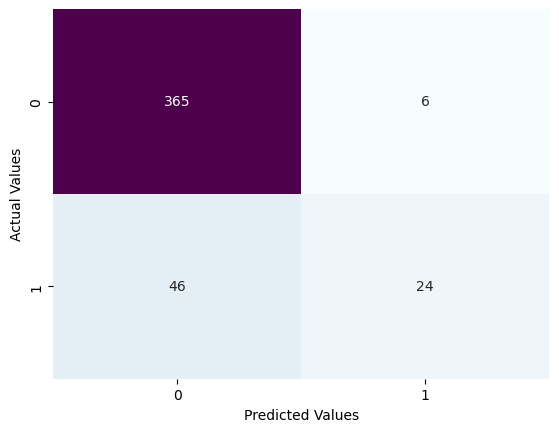

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.80      0.34      0.48        70

    accuracy                           0.88       441
   macro avg       0.84      0.66      0.71       441
weighted avg       0.87      0.88      0.86       441

Accuracy of the model: 0.8820861678004536


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Classification report:')
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

In [49]:
hr["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

## Upsampling

Attrition
0    0.711483
1    0.288517
Name: proportion, dtype: float64


<Axes: ylabel='count'>

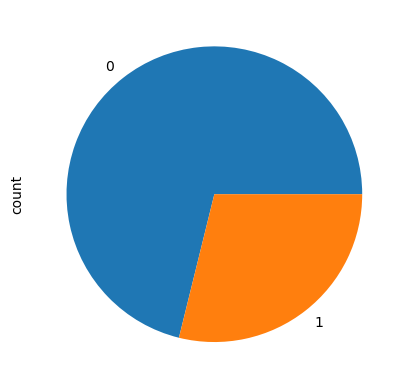

In [74]:
from sklearn.utils import resample

df_majority = hr[hr.Attrition == 0]
df_minority = hr[hr.Attrition == 1]

df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples=500,
                                random_state=0)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.Attrition.value_counts(normalize=True))

df_upsampled.Attrition.value_counts().plot(kind="pie")

In [96]:
df_upsampled

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,4,1,79,3,1,2,4,2,3068,11864,0,0,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,3,0,81,4,1,2,1,1,2670,9964,4,0,1,20,4,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,36,1,2,318,1,9,3,3,1,90,4,1,79,2,1,6,3,1,3388,21777,0,0,1,17,3,1,80,1,2,0,2,1,0,0,0
749,52,1,2,266,2,2,1,2,1,1038,1,0,57,1,5,3,4,1,19845,25846,1,0,0,15,3,4,80,1,33,3,3,32,14,6,9
453,26,1,1,426,0,17,4,1,1,608,2,0,58,3,1,1,3,0,2741,22808,0,0,1,11,3,2,80,1,8,2,2,7,7,1,0
236,33,1,2,465,1,2,2,1,1,328,1,0,39,3,1,2,1,1,2707,21509,7,0,0,20,4,1,80,0,13,3,4,9,7,1,7


In [97]:
X = df_upsampled.drop(['Attrition'], axis=1)
Y = df_upsampled['Attrition']

In [99]:
X.shape
Y.shape

(1733,)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [101]:
X.shape
Y.shape

(1733,)

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,
    random_state = 0
)

In [103]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1213, 34)
(520, 34)
(1213,)
(520,)


In [104]:
## Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=0)

model_DecisionTree.fit(x_train,y_train)

y_pred = model_DecisionTree.predict(x_test)

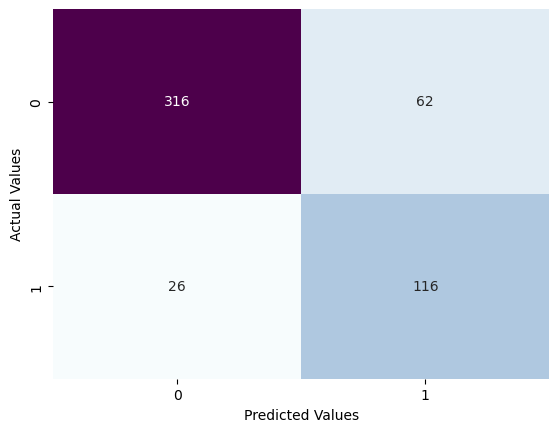

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       378
           1       0.65      0.82      0.72       142

    accuracy                           0.83       520
   macro avg       0.79      0.83      0.80       520
weighted avg       0.85      0.83      0.84       520

Accuracy of the model: 0.8307692307692308


In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Classification report:')
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

## Logistic Reg

In [111]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,  # 33% data for testing and remaining data will be for training
    random_state = 0
)

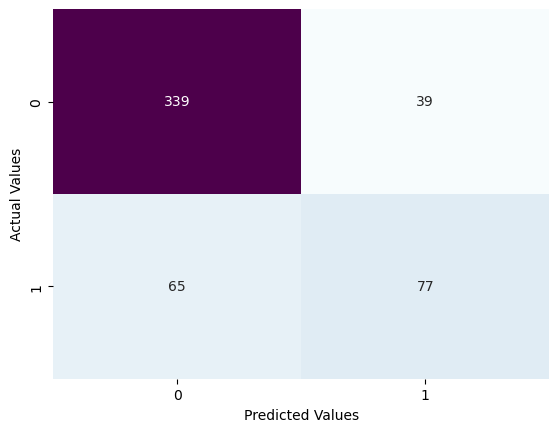

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       378
           1       0.66      0.54      0.60       142

    accuracy                           0.80       520
   macro avg       0.75      0.72      0.73       520
weighted avg       0.79      0.80      0.79       520

Accuracy of the model: 0.8


In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Classification report:')
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

## KFold

In [114]:
from sklearn.model_selection import KFold

# Model
classifier = LogisticRegression()

# Stratified K-Fold (preserves class proportion in each fold)
kfold_cv = KFold(n_splits=10, random_state=0, shuffle=True)

from sklearn.model_selection import cross_val_score

# Cross-validation
kfold_cv_result = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=kfold_cv)
print(kfold_cv_result)
print(kfold_cv_result.mean())

[0.80327869 0.7295082  0.76229508 0.76033058 0.84297521 0.7768595
 0.85950413 0.82644628 0.81818182 0.82644628]
0.8005825768866007


## SMOTE

In [115]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,0,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,0,14,3,4,80,0,17,3,2,9,6,0,8


In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
X = hr.drop(['Attrition'], axis=1)
Y = hr['Attrition']

In [118]:
X.shape
Y.shape

(1470,)

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,
    random_state = 0
)

In [121]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 34)
(441, 34)
(1029,)
(441,)


In [122]:
print("Before Oversampling,counts of label '1':",(sum(y_train==1)))
print("Before Oversampling,counts of label '0':",(sum(y_train==0)))

from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=0,k_neighbors=5)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

print("After Oversampling,the shape of train_X:",(x_train_res.shape))
print("After Oversampling,the shape of train_Y:",(x_train_res.shape))

print("Before Oversampling,counts of label '1':",(sum(y_train_res==1)))
print("Before Oversampling,counts of label '0':",(sum(y_train_res==0)))

Before Oversampling,counts of label '1': 167
Before Oversampling,counts of label '0': 862
After Oversampling,the shape of train_X: (1724, 34)
After Oversampling,the shape of train_Y: (1724, 34)
Before Oversampling,counts of label '1': 862
Before Oversampling,counts of label '0': 862


In [123]:
hr["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

## Decision tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=0)

model_DecisionTree.fit(x_train,y_train)

y_pred = model_DecisionTree.predict(x_test)

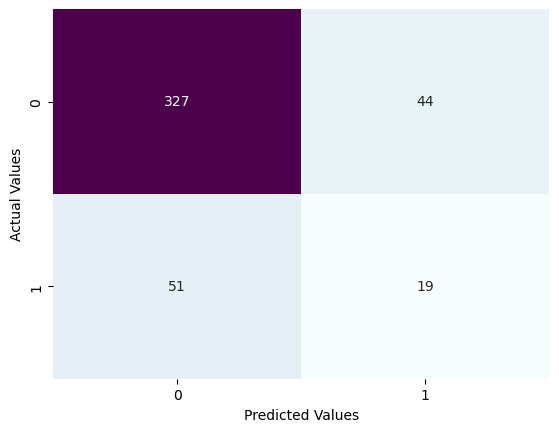

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       371
           1       0.30      0.27      0.29        70

    accuracy                           0.78       441
   macro avg       0.58      0.58      0.58       441
weighted avg       0.78      0.78      0.78       441

Accuracy of the model: 0.7845804988662132


In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Classification report:')
print(classification_report(y_test,y_pred))

acc1 = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc1)

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [127]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,  # 33% data for testing and remaining data will be for training
    random_state = 0
)

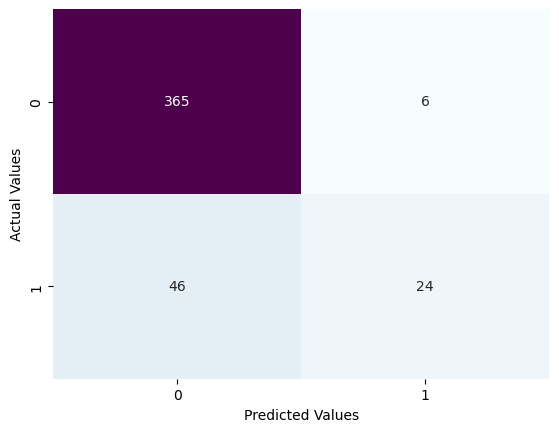

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.80      0.34      0.48        70

    accuracy                           0.88       441
   macro avg       0.84      0.66      0.71       441
weighted avg       0.87      0.88      0.86       441

Accuracy of the model: 0.8820861678004536


In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Classification report:')
print(classification_report(y_test,y_pred))

acc2 = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc2)